#Importing the necessary libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.impute import SimpleImputer

#Loading the dataset

In [119]:
data = pd.read_csv("life_expectancy_data.csv")

# Displaying the first few rows of the dataset to understand its structure

In [120]:
data.head()

,Life expectancy,Adult Mortality,infant deaths,GDP,Population
0,65.0,263.0,62,584.259210,33736494.0
1,59.9,271.0,64,612.696514,327582.0
2,59.9,268.0,66,631.744976,31731688.0
3,59.5,272.0,69,669.959000,3696958.0
4,59.2,275.0,71,63.537231,2978599.0


# Brief Dataset Overview

In [121]:
print(data.head())
print(data.info())
print(data.describe())

   Life expectancy   Adult Mortality  infant deaths         GDP  Population
0              65.0            263.0             62  584.259210  33736494.0
1              59.9            271.0             64  612.696514    327582.0
2              59.9            268.0             66  631.744976  31731688.0
3              59.5            272.0             69  669.959000   3696958.0
4              59.2            275.0             71   63.537231   2978599.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Life expectancy   2928 non-null   float64
 1   Adult Mortality   2928 non-null   float64
 2   infant deaths     2938 non-null   int64  
 3   GDP               2490 non-null   float64
 4   Population        2286 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 114.9 KB
None
       Life expectancy   Adult Mortality  infant dea

# Data Visualization
# Creating a correlation heatmap to visualize the relationships between variables

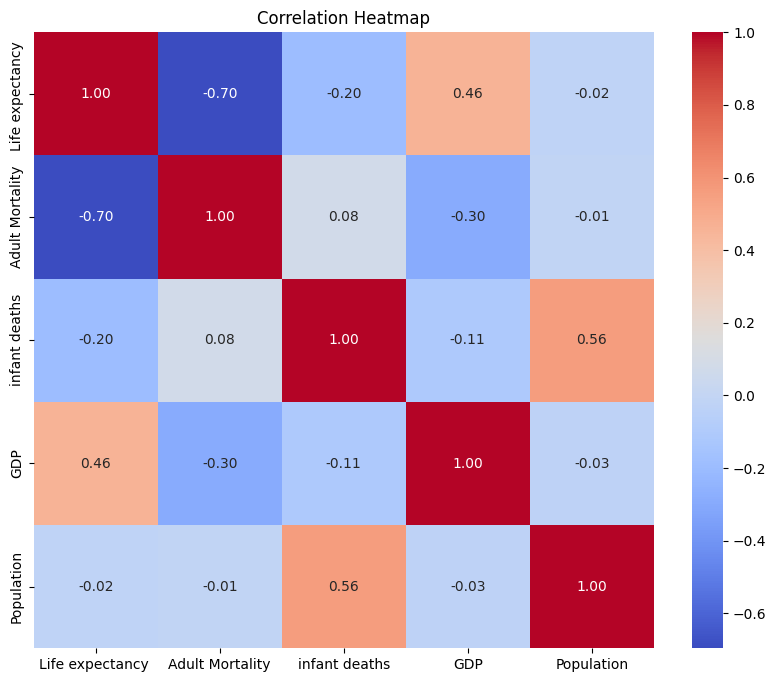

In [122]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plot: GDP vs Life expectancy
# Visualizing the relationship between GDP and life expectancy

Text(0, 0.5, 'Life Expectancy')

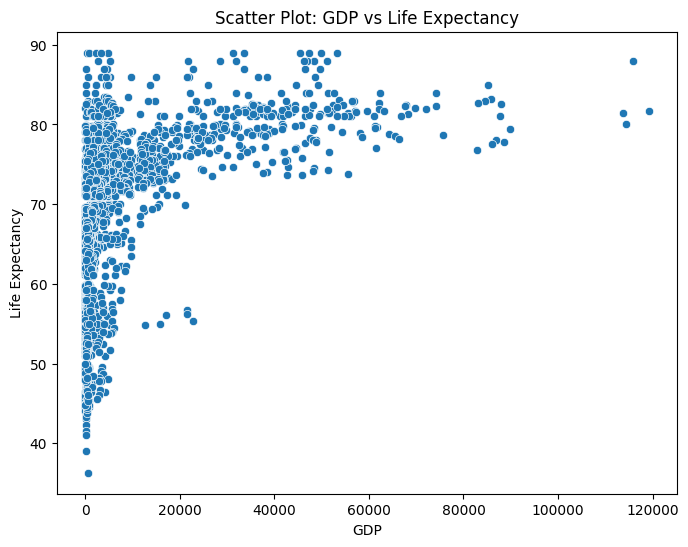

In [123]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='GDP', y='Life expectancy ')
plt.title('Scatter Plot: GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

# Scatter Plot: Adult Mortality vs Life expectancy
# Visualizing the relationship between adult mortality and life expectancy

Text(0.5, 0, 'Adult Mortality')

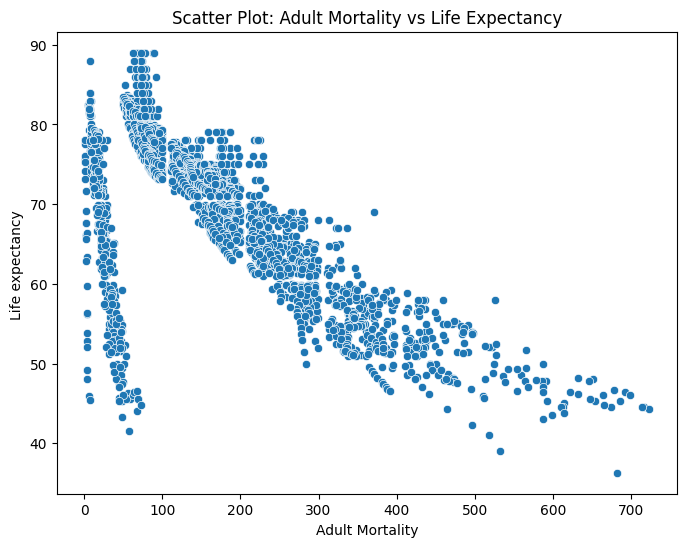

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Adult Mortality', y='Life expectancy ')
plt.title('Scatter Plot: Adult Mortality vs Life Expectancy')
plt.xlabel('Adult Mortality')

# Data Preparation
# Separating the independent variables (X) from the target variable (y)

In [125]:
X = data.drop('Life expectancy ', axis=1)  # Independent variables
y = data['Life expectancy ']  # Target variable (Life expectancy)

# Displaying the first few rows of X and y

In [126]:
X.head()

,Adult Mortality,infant deaths,GDP,Population
0,263.0,62,584.259210,33736494.0
1,271.0,64,612.696514,327582.0
2,268.0,66,631.744976,31731688.0
3,272.0,69,669.959000,3696958.0
4,275.0,71,63.537231,2978599.0


In [127]:
# Displaying the y
y.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


# Handling Missing Values using SimpleImputer
# Impute missing values in the independent variables and target using the mean strategy

In [128]:
imputer = SimpleImputer(strategy='mean')  # Using the mean strategy for imputation
X_imputed = imputer.fit_transform(X)  # Impute missing values in X
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Impute missing values in y

# Scaling the features using StandardScaler
# Splitting the dataset into training and testing sets (80% training, 20% testing)

In [129]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Apply scaling to the independent variables

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

# Linear Regression Model
# Creating and training the linear regression model

In [130]:
lr = LinearRegression()
lr.fit(X_train, y_train)  # Fit the model on the training data
y_pred_lr = lr.predict(X_test)  # Predict life expectancy on the test set
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Calculate the Mean Squared Error for Linear Regression

# Random Forest Regression Model
# Creating and training the Random Forest regression model

In [131]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)  # Fit the model on the training data
y_pred_rf = rf.predict(X_test)  # Predict life expectancy on the test set
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Calculate the Mean Squared Error for Random Forest Regression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# Decision Tree Regression Model
# Creating and training the Decision Tree regression model

is to Predict life expectancy on the test set and Calculate the Mean Squared Error for Decision Tree Regression

In [132]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Displaying the Mean Squared Errors for all models

To identify the lowest MSE model

In [133]:
print(f"Linear Regression MSE: {mse_lr}")
print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Decision Tree Regression MSE: {mse_dt}")

Linear Regression MSE: 38.94577171695234
Random Forest Regression MSE: 5.831173672042695
Decision Tree Regression MSE: 9.55737067743764


# Save the Best Model

In [134]:
models = {'Linear Regression': (lr, mse_lr),
          'Random Forest': (rf, mse_rf),
          'Decision Tree': (dt, mse_dt)}

# Comparing the models
saving the one with the lowest Mean Squared Error (MSE)
Saving the best model to a file using joblib

In [135]:
best_model_name, (best_model, best_mse) = min(models.items(), key=lambda x: x[1][1])
print(f"Best Model: {best_model_name} with MSE: {best_mse}")
joblib.dump(best_model, "best_model.pkl")



Best Model: Random Forest with MSE: 5.831173672042695


['best_model.pkl']

# Making Predictions on Test Data
Displaying predictions on the test set

In [136]:
X_test

array([[-0.33690733, -0.18916651, -0.43556163,  0.1145145 ],
       [-0.41751402, -0.25701693,  0.29542357, -0.23701556],
       [-0.32078599, -0.25701693, -0.11618297, -0.22557766],
       ...,
       [ 0.78352565, -0.23157302,  0.        ,  0.        ],
       [ 0.18703615, -0.25701693, -0.45583507, -0.23454931],
       [-0.26436131, -0.24853562, -0.51858473, -0.22335958]])

# Predicting a few data points
To compare the predicted data to the initial data

In [137]:
sample = X_test[0:5]
prediction = best_model.predict(sample)
print(f"Initial Prediction: {y_test[0:5]}")
print(f"Prediction for single data point: {prediction}")

Initial Prediction: [[73.7]
 [75.9]
 [74.2]
 [76.8]
 [51.9]]
Prediction for single data point: [73.988 75.343 74.621 80.577 52.084]


# Load the best model
Loading the best model saved previously

# Visualizing Actual vs Predicted Life Expectancy using a scatter plot

visualizing the predicted data and the actual data to evaluate the model

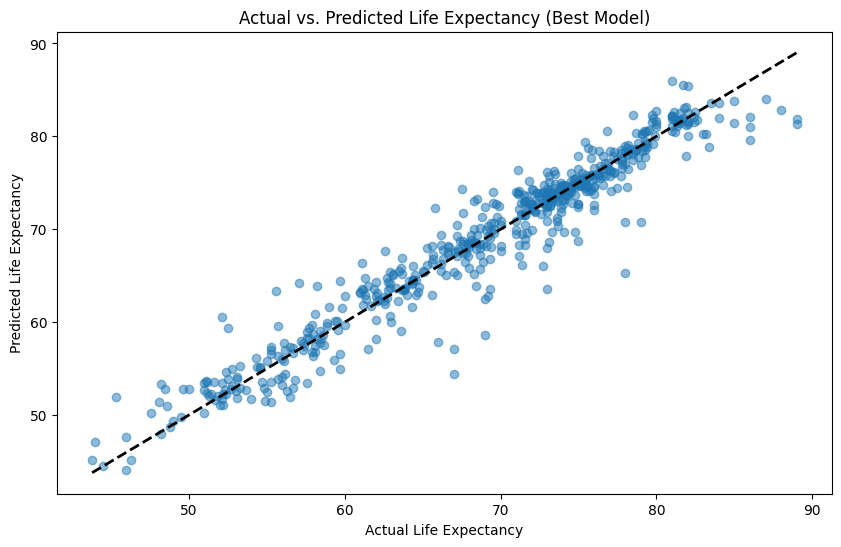

In [138]:
# Load the best model
best_model = joblib.load("best_model.pkl")

# Visualizing Actual vs Predicted Life Expectancy using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy (Best Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.show()